## Time Series Visual Analysis



## Imports

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from matplotlib.ticker import MaxNLocator
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

### Creating a Toy dataset
A time series can be composed of the following three components:

- **Trend**: Represents the long-term movement in the data. Here, we simulate a **linear trend**.
- **Seasonality**: Refers to periodic fluctuations. We use a **sinusoidal function** to simulate monthly variations.
- **Random Noise**: Adds unpredictability to the data, representing real-world randomness.
- This combination helps us create a realistic time series dataset for analysis.


In [6]:
np.random.seed(0)
time = pd.date_range(start='2000-01-01', periods=100, freq='M')
trend = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, 100)
time_series = trend + noise

We can visualize the time series using a simple line plot.

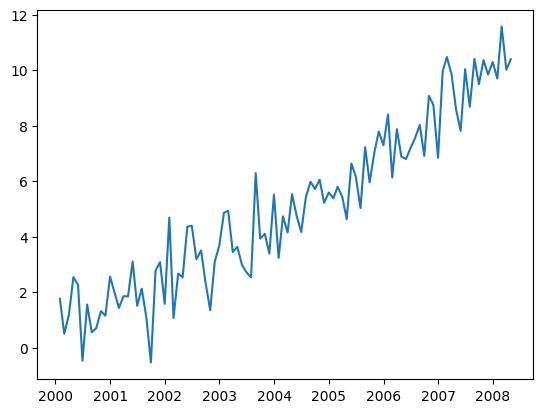

In [8]:
plt.plot(time, time_series, label='Time Series with Trend')
plt.show()

- The time series plot allows you to **visualize patterns** like upward trends, periodic behavior, and fluctuations.
- The **ACF plot (Autocorrelation Function)** helps you understand how observations in a time series are related to each other over different time lags.
- **Autocorrelation** measures how similar a time series is to itself at different lags. High autocorrelation indicates that past values influence current values.
- ACF plots are useful in identifying **seasonality**.

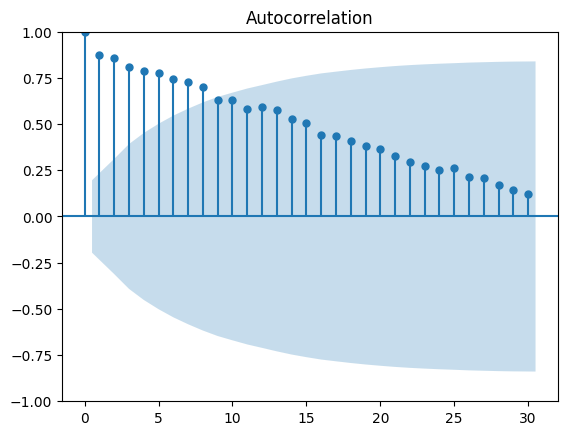

In [22]:
plot_acf(time_series, lags=30);

Let's make up more time series data with some seasonality

In [23]:
date_range = pd.date_range(start='2019-01-01', end='2021-12-31', freq='M')
n = len(date_range)
trend = np.linspace(10, 50, n)
seasonality = 10 * np.sin(np.linspace(0, 3 * 2 * np.pi, n))
noise = np.random.normal(loc=0, scale=3, size=n)
sales_data = trend + seasonality + noise

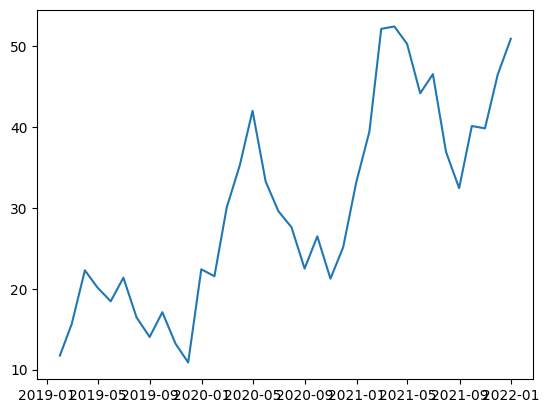

In [24]:
plt.plot(date_range, sales_data, label='Time Series with Trend')
plt.show()

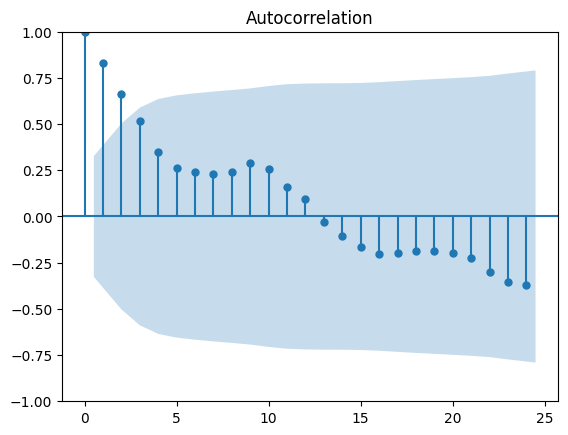

In [25]:
plot_acf(sales_data, lags=24);

### Smoothing Time Series with Moving Averages

- **Moving Average**: A technique that helps to smooth out short-term fluctuations and highlight long-term trends.
- A **3-month moving average** provides a smoother curve that helps to reduce the noise but is still responsive to short-term changes.
- A **6-month moving average** provides a smoother trend line that is more suitable for identifying long-term patterns.
- **Smoothing** can help you focus on the **underlying trend** in the presence of noise.



In [33]:
# Create a DataFrame
df_sales = pd.DataFrame({'Date': date_range, 'Monthly_Sales': sales_data})
df_sales.set_index('Date', inplace=True)

df_sales.head(10)

,Monthly_Sales
Date,
2019-01-31,11.729772
2019-02-28,15.646954
2019-03-31,22.279690
2019-04-30,20.139318
2019-05-31,18.443388
2019-06-30,21.371298
2019-07-31,16.460770
2019-08-31,14.027242
2019-09-30,17.097014


In [34]:
df_sales['3_Month_MA'] = df_sales['Monthly_Sales'].rolling(window=3).mean() # 3-month moving average
df_sales['6_Month_MA'] = df_sales['Monthly_Sales'].rolling(window=6).mean() # 6-month moving average

df_sales.head(15)

,Monthly_Sales,3_Month_MA,6_Month_MA
Date,,,
2019-01-31,11.729772,NaN,NaN
2019-02-28,15.646954,NaN,NaN
2019-03-31,22.279690,16.552139,NaN
2019-04-30,20.139318,19.355320,NaN
2019-05-31,18.443388,20.287465,NaN
2019-06-30,21.371298,19.984668,18.268403
2019-07-31,16.460770,18.758486,19.056903
2019-08-31,14.027242,17.286437,18.786951
2019-09-30,17.097014,15.861675,17.923172


In [38]:
df_sales['Monthly_Sales'][:3].sum()/3

16.55213861409788

In [39]:
df_sales['Monthly_Sales'][:6].sum()/6

18.26840332497773

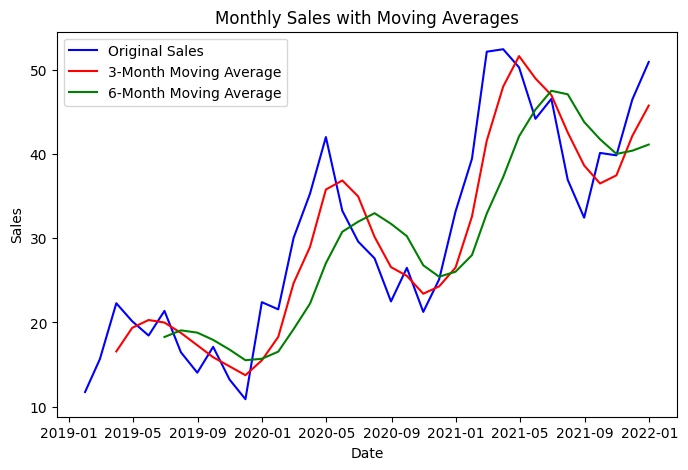

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(df_sales.index, df_sales['Monthly_Sales'], color='blue', label='Original Sales')
plt.plot(df_sales.index, df_sales['3_Month_MA'], color='red', label='3-Month Moving Average')
plt.plot(df_sales.index, df_sales['6_Month_MA'], color='green', label='6-Month Moving Average')
plt.title('Monthly Sales with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Questions for Reflection:
- How does the 3-month moving average differ from the 6-month moving average?
- What insights can you gather from the smoothed time series?


## In Class Activity 1 (~5 min)

Do two different kinds of smoothings using appropriate moving averages for the time series `time_series` generated in the beginning of the notebook.

In [41]:
# Your code here

### Additive and Multiplicative Decomposition

- **Decomposition** allows us to separate a time series into **trend**, **seasonal**, and **residual** components.
- **Additive Decomposition** assumes that the components combine linearly: $ X_t = T_t + S_t + R_t $.
- **Multiplicative Decomposition** assumes that the components multiply: $ X_t = T_t \times S_t \times R_t $.
- Use **additive decomposition** when the seasonal variation is roughly constant over time.
- Use **multiplicative decomposition** when the seasonal variation changes proportionally with the trend.

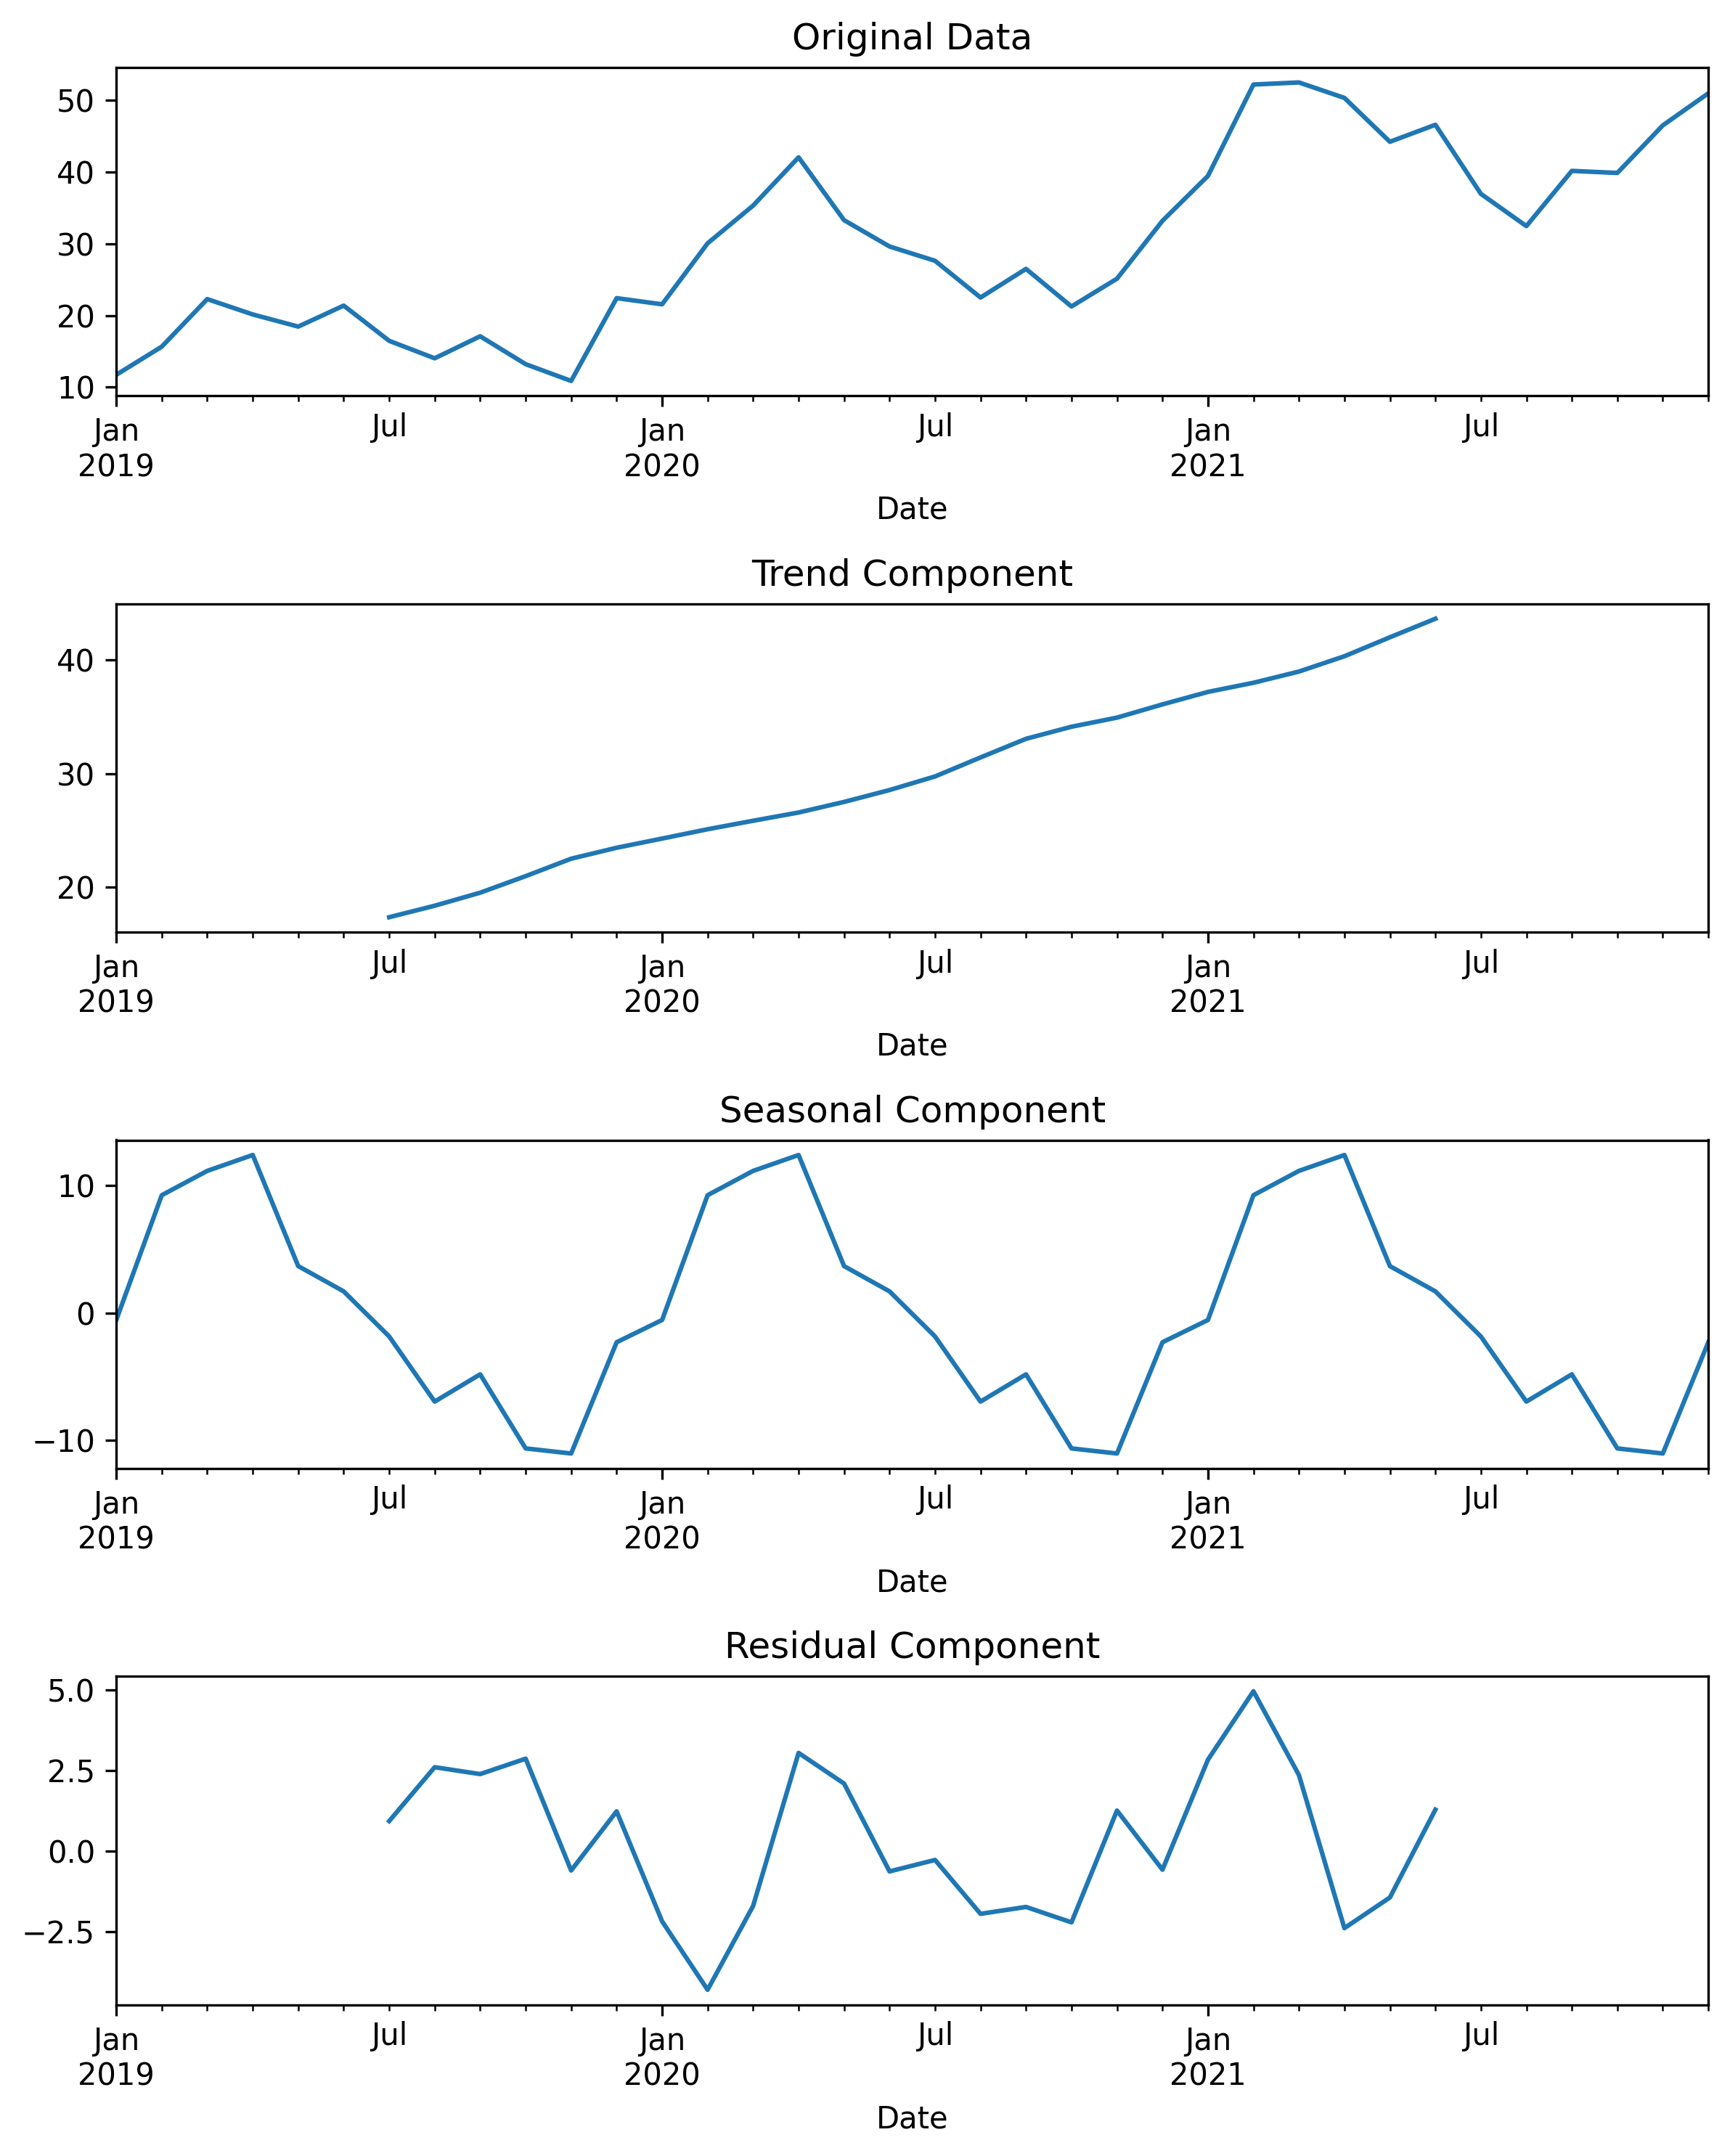

In [58]:
# Perform additive decomposition
result = seasonal_decompose(df_sales['Monthly_Sales'], model='additive', period=12)

# Create subplots for each component
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10))
fig.dpi = 300  # Set the figure DPI to 300

# Plot the original data
ax1.set_title("Original Data")
df_sales['Monthly_Sales'].plot(ax=ax1)

# Plot the trend component
ax2.set_title("Trend Component")
result.trend.plot(ax=ax2)

# Plot the seasonal component
ax3.set_title("Seasonal Component")
result.seasonal.plot(ax=ax3)

# Plot the residual component
ax4.set_title("Residual Component")
result.resid.plot(ax=ax4)

plt.tight_layout()
plt.show()

Alternatively, you could simply use the `.plot` function qith the decomposition result itself as follows:

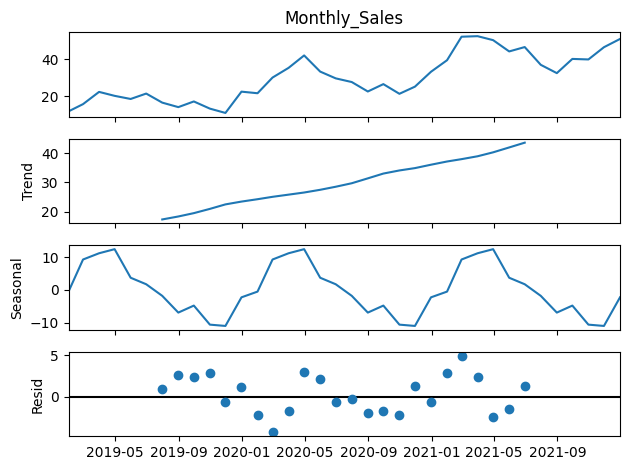

In [53]:
decomposition_additive.plot();

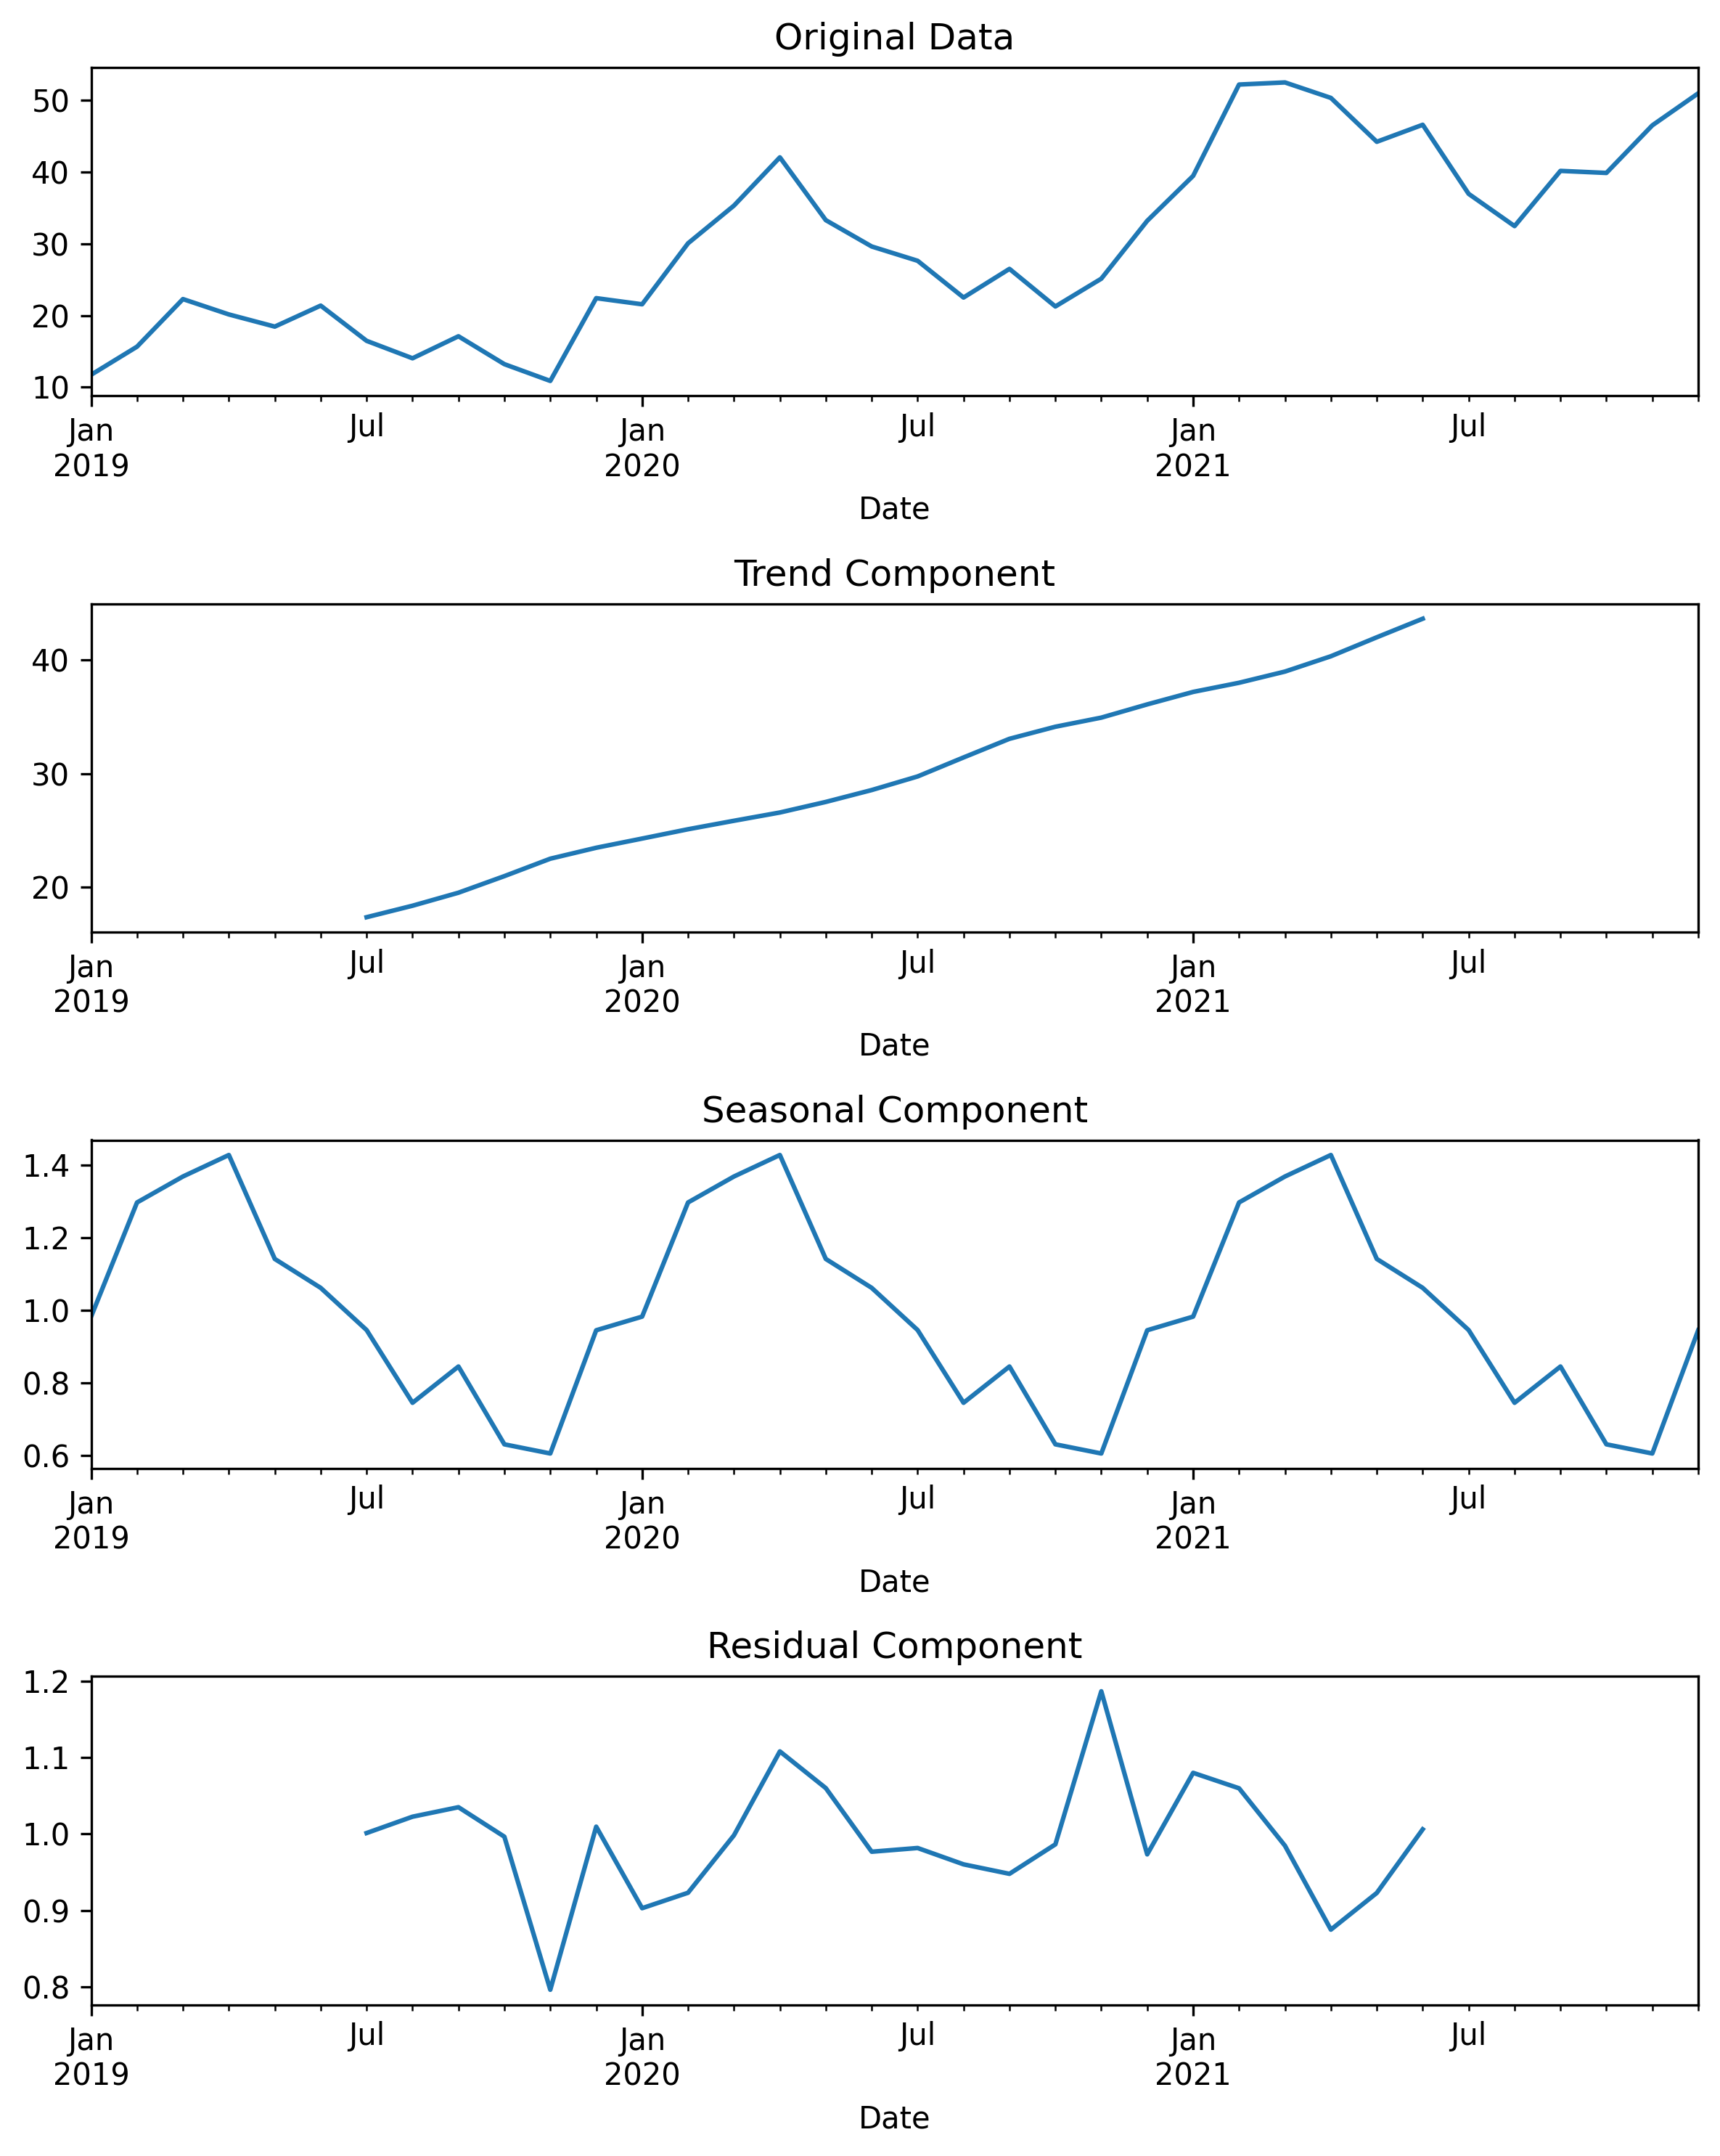

In [55]:
# Perform multiplicative decomposition
result = seasonal_decompose(df_sales['Monthly_Sales'], model='multiplicative', period=12)

# Create subplots for each component
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10))
fig.dpi = 300  # Set the figure DPI to 300

# Plot the original data
ax1.set_title("Original Data")
df_sales['Monthly_Sales'].plot(ax=ax1)

# Plot the trend component
ax2.set_title("Trend Component")
result.trend.plot(ax=ax2)

# Plot the seasonal component
ax3.set_title("Seasonal Component")
result.seasonal.plot(ax=ax3)

# Plot the residual component
ax4.set_title("Residual Component")
result.resid.plot(ax=ax4)

plt.tight_layout()
plt.show()

- The **residual component** should ideally represent random noise after removing trend and seasonality.
- If no clear patterns remain in the residuals, it indicates that the decomposition has effectively isolated the trend and seasonal components.
- A **mean close to zero** suggests that the residuals are centered, while a small standard deviation indicates most residuals are close to zero.

- Which type of decomposition better describes this dataset?
- How do the trend and seasonal components differ between additive and multiplicative decomposition?

## In Class Activity 2 (~ 15 mins)

Load [this](https://raw.githubusercontent.com/qurat-azim/instructionaldatasets/refs/heads/main/data/AirPassengers.csv) time series data file into a dataframe and perform the following tasks:

- Plot the raw time series.
- Plot the ACF for this time series.
- Do 4-month and yearly moving averages and plot them.
- Perform two different decompositions for the time series with appropriate period. Explain which one you think is better and why?

In [60]:
# Your code here